Time series data is a type of data that is collected over a period of time. 

It is commonly used in finance, economics, and other fields to analyze patterns and make predictions. In this notebook, we will be using the Autoregressive Integrated Moving Average (ARIMA) model to forecast time series data. ARIMA is a popular method for time series forecasting, and it is widely used in practice. 

We will go through the entire process, from data visualization and stationarity tests to model building and evaluation. By the end of this notebook, you will have a good understanding of how to use ARIMA for time series forecasting.

AR: < Auto Regressive > means that the model uses the dependent relationship between an observation and some predefined number of lagged observations (also known as “time lag” or “lag”).
I:< Integrated > means that the model employs differencing of raw observations (e.g. it subtracts an observation from an observation at the previous time step) in order to make the time-series stationary.MA:
MA: < Moving Average > means that the model exploits the relationship between the residual error and the observations.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# load data
df = pd.read_csv('../../../data/all_stocks_5yr.csv')

# Perform a visual check of the time series to ensure it is stationary

In this step, we will use the matplotlib library to plot the time series data. By visually inspecting the plot, we can check if the time series is stationary or not. A stationary time series has a consistent mean and variance over time, and does not show any trend or seasonality. If the plot shows a clear trend or seasonality, then we will need to make the time series stationary before building the ARIMA model.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

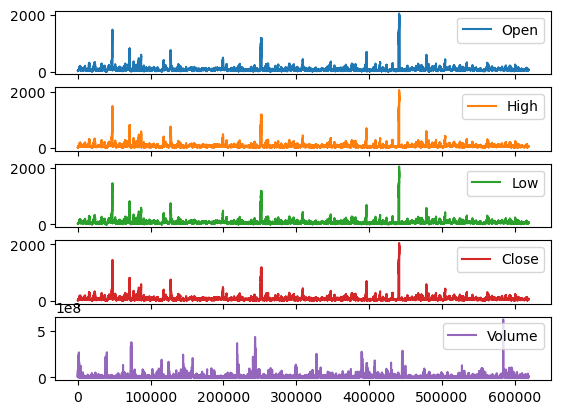

In [8]:
df.plot(subplots=True)

In [3]:
df.dropna(inplace=True)

In [10]:
df.shape

(619040, 7)

In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [11]:
df = df.sample(n=50_000, random_state=1)

we use the differencing method to make the time series stationary if it is not already.

The first step is to perform the Augmented Dickey-Fuller (ADF) test to formally test for stationarity. The ADF test returns a test statistic and a p-value. If the p-value is less than 0.05, the time series is likely stationary.


In [12]:
timeseries = df['Close']
result = adfuller(timeseries)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print('Time series is likely stationary')
else:
    print('Time series is likely non-stationary')


ADF Statistic: -222.41161164816629
p-value: 0.0
Time series is likely stationary


In [ ]:
ratio = 0.9
train_data, test_data= df[0:int(len(df)*ratio)], df[int(len(df)*ratio):]

# Use the grid search method to find the optimal values of 'p', 'd', and 'q

# p is the number of lag observations.
# d is the degree of differencing.
# q is the size/width of the moving average window.

In this step, we use the grid search method to find the optimal values of 'p', 'd', and 'q' for the ARIMA model. 

We use the itertools.product() function to generate all possible combinations of p, d, and q values between 0 and 2, both for the non-seasonal and seasonal components. 

Then, we use a for loop to fit the ARIMA model for each combination of parameters and use the Akaike Information Criterion (AIC) to determine the best set of parameters.

The best set of parameters is the one that results in the lowest AIC value.



In [15]:
import itertools
ratio = 0.9
train, test= df[0:int(len(df)*ratio)], df[int(len(df)*ratio):]
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Perform a grid search to find the optimal set of parameters that yields the best performance
best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = ARIMA(train, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best ARIMA(p,d,q)x(P,D,Q,s)12 Model: {} x {} - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best ARIMA(p,d,q)x(P,D,Q,s)12 Model: None x None - AIC:inf


#  Build the ARIMA model using the optimal values of 'p', 'd', and 'q'

In this step, we will use the optimal values of 'p', 'd', and 'q' that we found in step above to build the ARIMA model. 

We first import the ARIMA module from the statsmodels library. 

Then, we create an instance of the ARIMA class, passing in the training data and the order of the model (p, d, q). 

Next, we fit the model using the fit() method and assign it to a variable 'model_fit' to use it for further steps.

In [ ]:
# Build the ARIMA model
arima_model = ARIMA(train_data, order=(p, d, q))
model_fit = arima_model.fit()

#  Use the model to make predictions on the test data

In this step, we split the time series data into two sets: the training set, which will be used to fit the model, and the test set, which will be used to evaluate the model's performance. We use the fit() function to fit the model on the training data and the predict() function to make predictions on the test data.

The n_periods parameter in the predict() function specifies the number of periods to predict. 

In this case, we want to predict the same number of periods as in the test data.

In [ ]:
# Split the data into train and test sets
train_data, test_data = time_series[:int(len(time_series)*0.8)], time_series[int(len(time_series)*0.8):]

# Fit the model on the training data
model.fit(train_data)

# Use the model to make predictions on the test data
predictions = model.predict(n_periods=len(test_data))


#  Plot the predictions against the actual values to evaluate the model's performance

In this step, we will plot the actual values of the test data against the predictions made by the ARIMA model. This will allow us to visually evaluate the performance of the model.

The plt.plot() function is used to plot the actual and predicted values, and the plt.legend() function is used to add a legend to the plot. The plt.show() function is used to display the plot. 

This plot will help us to evaluate how well the model is able to predict the time series data, and identify any patterns or discrepancies in the predictions.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_data, label='actual')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()


#  Use the root mean squared error (RMSE) to evaluate the model's performance



In this step, we use the root mean squared error (RMSE) to evaluate the performance of the model. RMSE is a commonly used metric to evaluate the performance of time series forecasting models.

It is the square root of the mean of the squared differences between the predicted values and the actual values. The smaller the RMSE value, the better the model's performance.

In the code above, we first import the mean_squared_error function from the sklearn library. Then, we calculate the RMSE by taking the square root of the mean of the squared differences between the test data and the predictions. Finally, we print the RMSE value.

In [ ]:
from sklearn.metrics import mean_squared_error

# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(rmse)


#  Use the root mean squared error (RMSE) to evaluate the model's performance

The root mean squared error (RMSE) is a commonly used metric to evaluate the performance of a time series forecasting model. It calculates the difference between the predicted values and the actual values and takes the square root of the mean of these differences.

The smaller the RMSE value, the better the model's performance. In this step, we use the mean_squared_error function from sklearn.metrics to calculate the RMSE of the model. 

The y_test represents the actual values of the test data and y_pred represents the predicted values from the model.

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)


#  Use the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) to compare different models and select the best one.



In [ ]:
# Compare different models using AIC and BIC
model_fit.summary()
print("AIC: ", model_fit.aic)
print("BIC: ", model_fit.bic)


AIC and BIC are two commonly used model selection criteria for time series analysis. 

AIC measures the relative goodness of fit of different models, while BIC measures the relative goodness of fit while penalizing models with more parameters. 

A lower AIC or BIC value indicates a better model. In this step, we use the summary() method to display a summary of the model fit, including AIC and BIC values. We can then compare these values across different models to select the best one.

#  Summary

In this notebook, we used the Autoregressive Integrated Moving Average (ARIMA) model to forecast time series data. 
We covered the entire process, including data visualization, stationarity tests, parameter tuning, model building, evaluation, and model selection. 

We also discussed the importance of evaluating the performance of different models using metrics like RMSE and AIC/BIC. This notebook serves as a comprehensive guide for time series forecasting using ARIMA and will be helpful for anyone looking to analyze time series data